# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

# Business Exploration Questions

# Notebook Preparation

## Importing Modules

## Notebook Functions

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.feature_selection import RFECV
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# EDA

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


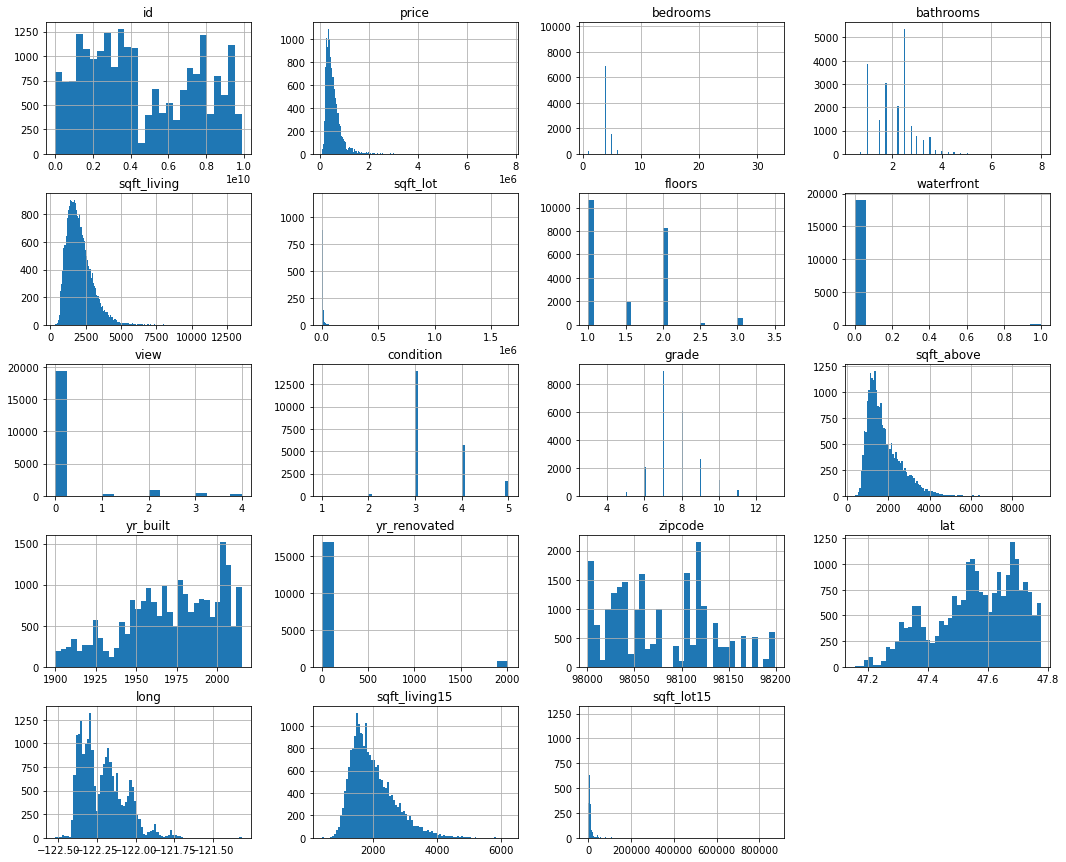

In [5]:
df.hist(figsize=(18,15), bins='auto');

## Data cleaning plan
* Drop lat, long (we will use zipcode for location performace metrics)
* Drop id, not needed
* Drop data outside the 95th percentile to remove outliers
* Locate and deal with null values
* Look for and deal with any unusual data entries
* Confirm our data types and convert any incorrect data types
* separate our continuous from our categorical data, as well as our data to be binned





* de-normalize sqft_lot, or ignore when normalizing the rest


In [6]:
# drop lat and long, we will use zipcode for the location feature
# drop id, we don't need it

df.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [7]:
# looking for outliers in the percentiles

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [8]:
#Investigate Percentiles on the price column to look for outliers
column = df['price']

for q in np.linspace(.01, .99, num=21):
    s1q =  round(column.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}'.format(round(q,2), s1q))

0.01th percentile:	set1: 154000.0
0.06th percentile:	set1: 219000.0
0.11th percentile:	set1: 250000.0
0.16th percentile:	set1: 275000.0
0.21th percentile:	set1: 300000.0
0.26th percentile:	set1: 325000.0
0.3th percentile:	set1: 349000.0
0.35th percentile:	set1: 373194.0
0.4th percentile:	set1: 400000.0
0.45th percentile:	set1: 425000.0
0.5th percentile:	set1: 450000.0
0.55th percentile:	set1: 480536.72
0.6th percentile:	set1: 517000.0
0.65th percentile:	set1: 550000.0
0.7th percentile:	set1: 590000.0
0.74th percentile:	set1: 639000.0
0.79th percentile:	set1: 698000.0
0.84th percentile:	set1: 766692.6
0.89th percentile:	set1: 865000.0
0.94th percentile:	set1: 1070000.0
0.99th percentile:	set1: 1970000.0


In [9]:
# remove outliers by keeping our center 98% of data
def percentile_2stddev(column):
    lower_range = round(column.quantile(q=.01), 2)
    upper_range = round(column.quantile(q=.99), 2)
    return lower_range, upper_range

In [10]:
# determing our center 98% of data

lower_range, upper_range = percentile_2stddev(column)
lower_range, upper_range

(154000.0, 1970000.0)

In [11]:
# dropping the things outside of our lower and upper range
df.drop(df[ (df.price > upper_range) | (df.price < lower_range) ].index , inplace=True)

In [12]:
df

# confirming we still have over 20k entries

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


In [13]:
df.describe()

# checking our data again. Bedrooms still seems to have outliers.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.116800e+04,21168.000000,21168.000000,21168.000000,2.116800e+04,21168.000000,18838.000000,21107.000000,21168.000000,21168.000000,21168.000000,21168.000000,17411.000000,21168.000000,21168.000000,21168.000000
mean,5.224627e+05,3.373299,2.109233,2062.214286,1.503666e+04,1.494591,0.005362,0.218411,3.411187,7.644747,1774.955263,1971.203515,81.620757,98077.935658,1978.789683,12714.702712
std,2.839807e+05,0.917234,0.741859,858.341801,4.114313e+04,0.539533,0.073028,0.732712,0.647961,1.122878,790.746695,29.319848,395.304973,53.299402,667.141496,27251.571533
min,1.540000e+05,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.250000e+05,3.000000,1.750000,1430.000000,5.020750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,1490.000000,5091.750000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.579500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7600.000000
75%,6.390000e+05,4.000000,2.500000,2530.000000,1.057525e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,1997.000000,0.000000,98117.000000,2350.000000,10033.250000
max,1.970000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,2015.000000,2015.000000,98199.000000,5790.000000,871200.000000


In [14]:
#Our only obvious outlier is the bedrooms value. check what is going on with the weird bedroom value

df.sort_values('bedrooms', ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,1330,4700
8748,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,1420,4960
13301,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,2730,10400
15147,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,2040,11914
19239,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,1810,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,4/28/2015,395000.0,1,1.00,900,6380,1.0,NaN,0.0,3,6,900,0.0,1947,0.0,98125,1830,6380
18843,8/4/2014,229500.0,1,1.00,1180,22000,1.0,0.0,2.0,3,6,1180,0.0,1948,0.0,98198,1890,11761
8523,8/14/2014,350000.0,1,1.00,900,6380,1.0,0.0,0.0,3,6,900,0.0,1947,0.0,98125,1830,6380
264,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,1230,14267


In [15]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean

In [16]:
df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outlier by imputing the mean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
8748,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,1420,4960
13301,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,2730,10400
15147,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,2040,11914
19239,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,1810,3745
18428,3/13/2015,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,3,7,1880,940.0,1918,0.0,98105,2460,4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,4/28/2015,395000.0,1,1.00,900,6380,1.0,NaN,0.0,3,6,900,0.0,1947,0.0,98125,1830,6380
18843,8/4/2014,229500.0,1,1.00,1180,22000,1.0,0.0,2.0,3,6,1180,0.0,1948,0.0,98198,1890,11761
8523,8/14/2014,350000.0,1,1.00,900,6380,1.0,0.0,0.0,3,6,900,0.0,1947,0.0,98125,1830,6380
264,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,0.0,98070,1230,14267


In [17]:
# sqft_lot also has some weird stuff happening, let's look at that too

df.sort_values('sqft_lot', ascending=False)

# there's a really big lot here, but it's not an obvious outlier. We leave it.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
1717,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0.0,1920,0.0,98022,2560,425581
17305,5/4/2015,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,2,5,710,0.0,1915,0.0,98014,1680,16730
7640,5/21/2014,542500.0,5,3.25,3010,1074218,1.5,NaN,0.0,5,8,2010,1000.0,1931,0.0,98027,2450,68825
7762,1/19/2015,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0.0,2006,0.0,98045,1830,11700
3945,9/5/2014,998000.0,4,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,0.0,1992,0.0,98058,2290,37141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,12/15/2014,256950.0,2,2.00,1070,635,2.0,0.0,0.0,3,9,720,350.0,2008,NaN,98106,1070,928
3449,4/22/2015,1230000.0,2,2.50,2470,609,3.0,0.0,0.0,3,11,1910,560.0,2011,0.0,98112,2440,1229
7582,1/22/2015,367500.0,2,2.00,1030,600,2.0,NaN,0.0,3,8,680,350.0,2004,0.0,98116,1120,1267
5821,1/7/2015,250000.0,3,2.25,1050,572,2.0,0.0,0.0,3,7,740,310.0,2006,0.0,98106,1260,1062


In [18]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2330
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3757
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1



In [20]:
# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0


In [21]:
# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [22]:
# we've removed the null values from our three binary columns

df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [24]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

date 
 6/23/2014    0.006614
6/26/2014    0.006094
6/25/2014    0.006047
4/27/2015    0.005858
7/8/2014     0.005763
Name: date, dtype: float64 


price 
 450000.0    0.008125
350000.0    0.008125
550000.0    0.007511
500000.0    0.007181
425000.0    0.007086
Name: price, dtype: float64 


bedrooms 
 3    0.458239
4    0.320200
2    0.125803
5    0.072704
6    0.012235
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.253071
1.00    0.173422
1.75    0.143519
2.25    0.096419
2.00    0.090939
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006472
1400    0.006283
1440    0.006236
1660    0.006094
1800    0.006094
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016818
6000    0.013464
4000    0.011810
7200    0.010157
4800    0.005574
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.493339
2.0    0.382086
1.5    0.088955
3.0    0.028628
2.5    0.006708
Name: floors, dtype: float64 


waterfront 
 0.0    0.995229
1.0    0.004771
Name: waterfront, dtype: float

In [25]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [26]:
# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold

df['month'] = pd.DatetimeIndex(df['date']).month

In [27]:
# data types are now fixed

df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

In [28]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,sqft_living15,sqft_lot15,month
count,2.116800e+04,21168.000000,21168.000000,21168.000000,2.116800e+04,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000,21168.000000
mean,5.224627e+05,3.371882,2.109233,2062.214286,1.503666e+04,1.494591,0.004771,0.093254,3.411187,7.644747,1774.955263,281.311177,1971.203515,0.033636,98077.935658,1978.789683,12714.702712,6.576720
std,2.839807e+05,0.894346,0.741859,858.341801,4.114313e+04,0.539533,0.068912,0.290795,0.647961,1.122878,790.746695,429.047340,29.319848,0.180294,53.299402,667.141496,27251.571533,3.114206
min,1.540000e+05,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,1.000000
25%,3.250000e+05,3.000000,1.750000,1430.000000,5.020750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,1490.000000,5091.750000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.579500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7600.000000,6.000000
75%,6.390000e+05,4.000000,2.500000,2530.000000,1.057525e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,540.000000,1997.000000,0.000000,98117.000000,2350.000000,10033.250000,9.000000
max,1.970000e+06,11.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,1.000000,98199.000000,5790.000000,871200.000000,12.000000


In [29]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

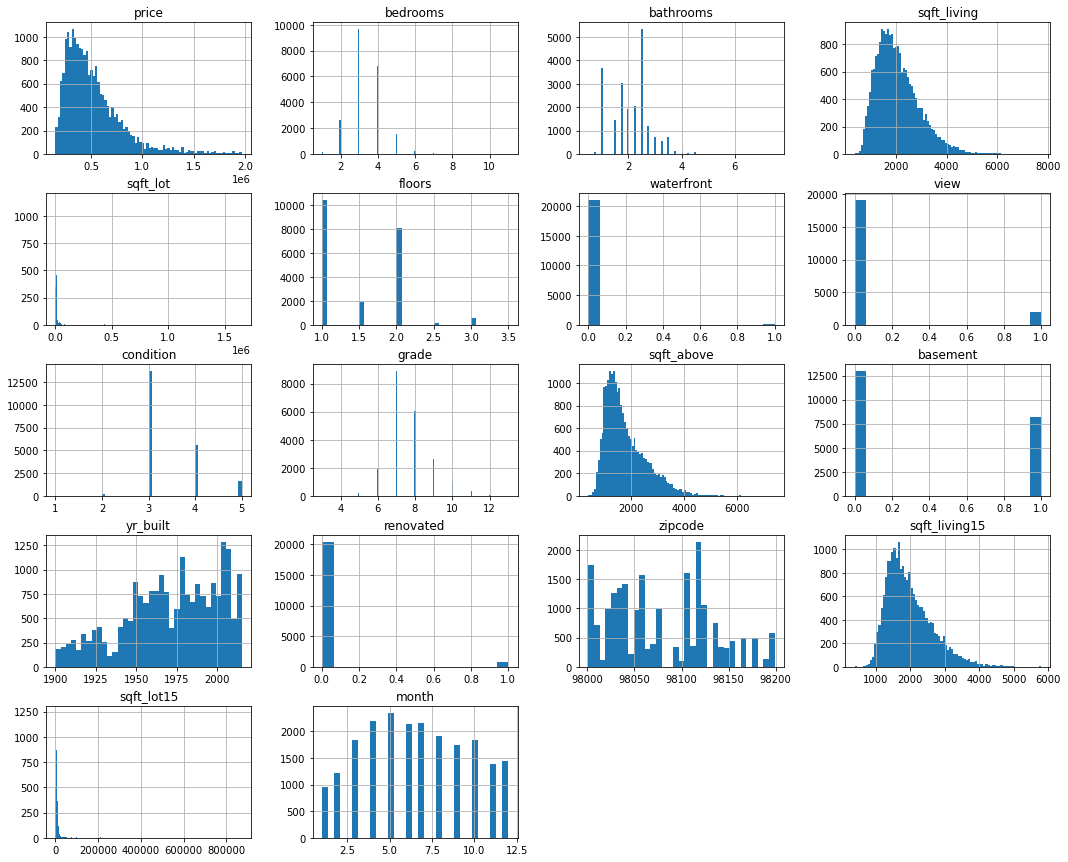

In [30]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');

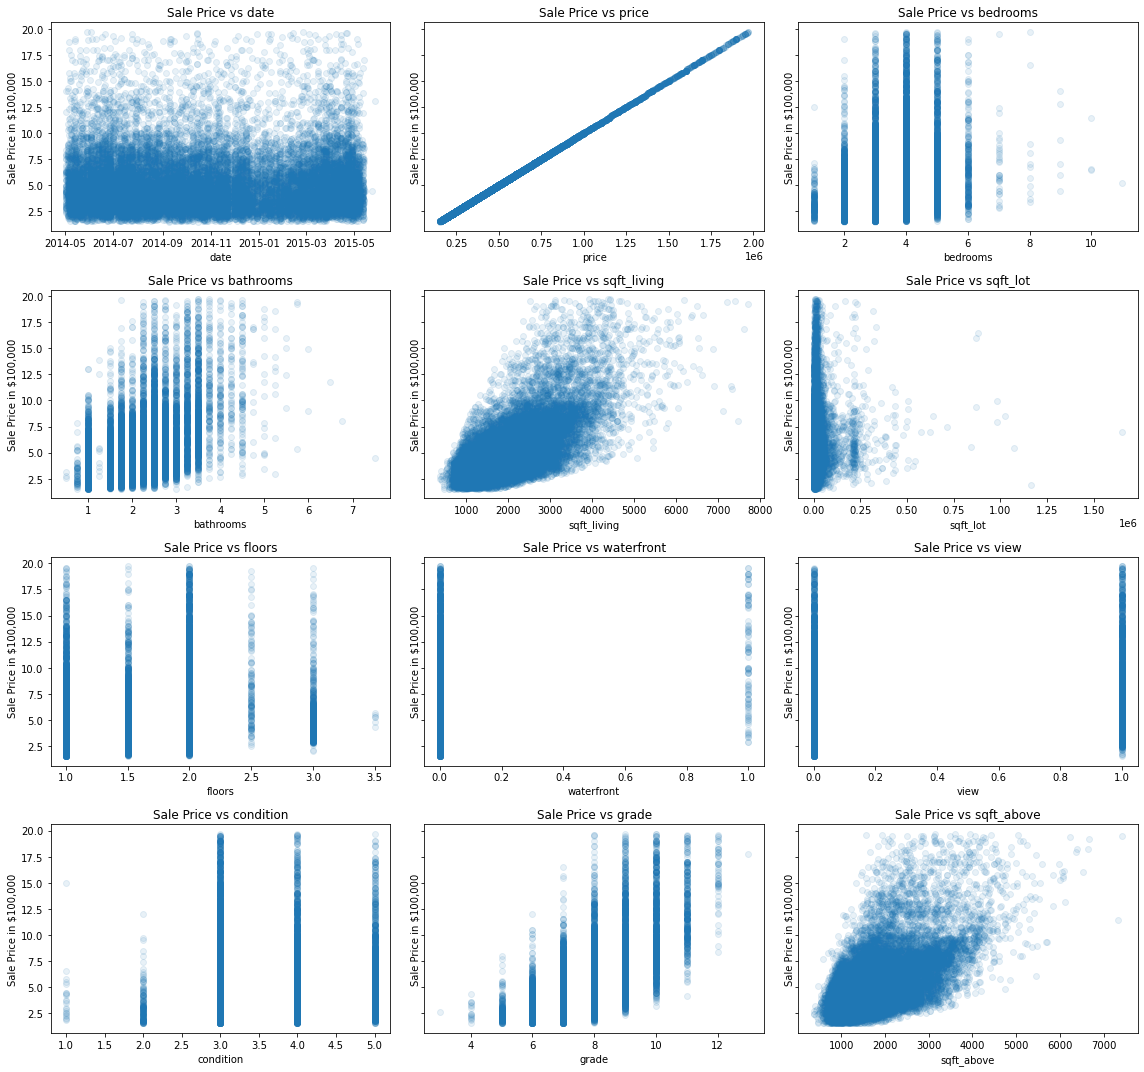

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

#### Notes 

Check the dist again of my continuous variables. Maybe I should not log convert all of them.

*** There are a few occasions when it’s better to one-hot encode variables into k variables instead of k-1:
* When building tree-based algorithms.
* When making feature selection with recursive algorithms.
* When interested in determining the importance of every single category.
* Here is an illustration of one-hot encoding into k variables

LinregressResult(slope=14044.835265313111, intercept=474553.10502467264, rvalue=0.03204620284237702, pvalue=3.110318382018246e-06, stderr=3010.9085193484857)

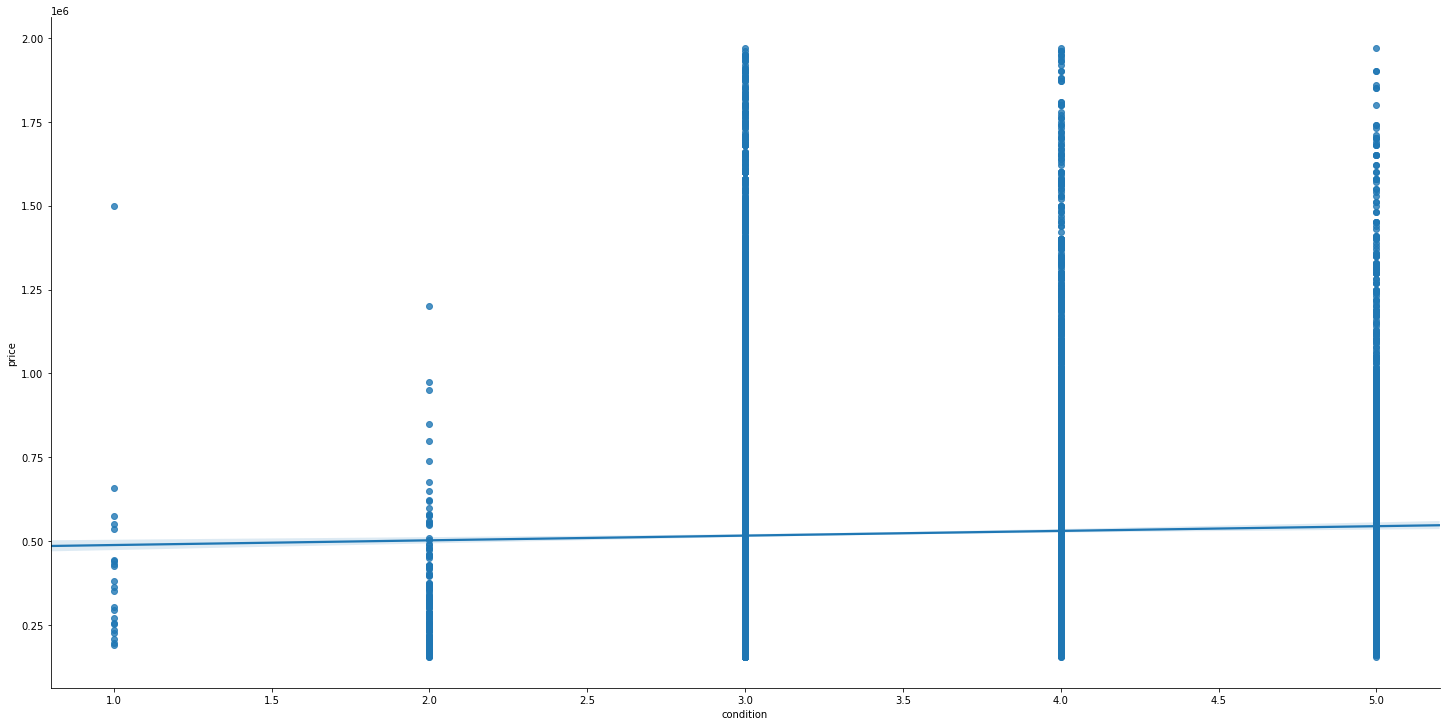

In [32]:
x = 'condition'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

from scipy.stats import linregress
linregress(df[x], df[y])

LinregressResult(slope=143099.73400925298, intercept=308587.1011565693, rvalue=0.2718743512134014, pvalue=0.0, stderr=3481.5806680526152)

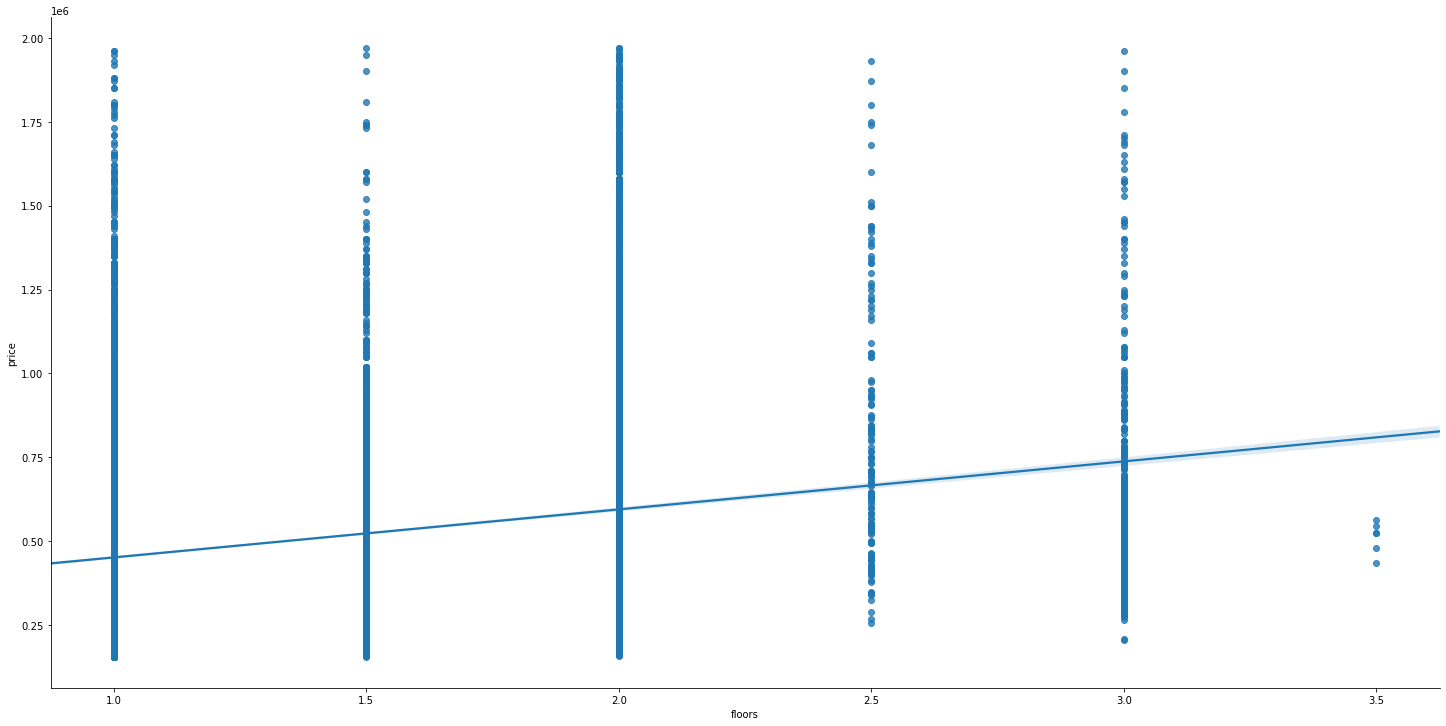

In [33]:
x = 'floors'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

LinregressResult(slope=170836.58940082483, intercept=-783539.8077852927, rvalue=0.6754987065643563, pvalue=0.0, stderr=1281.791063549955)

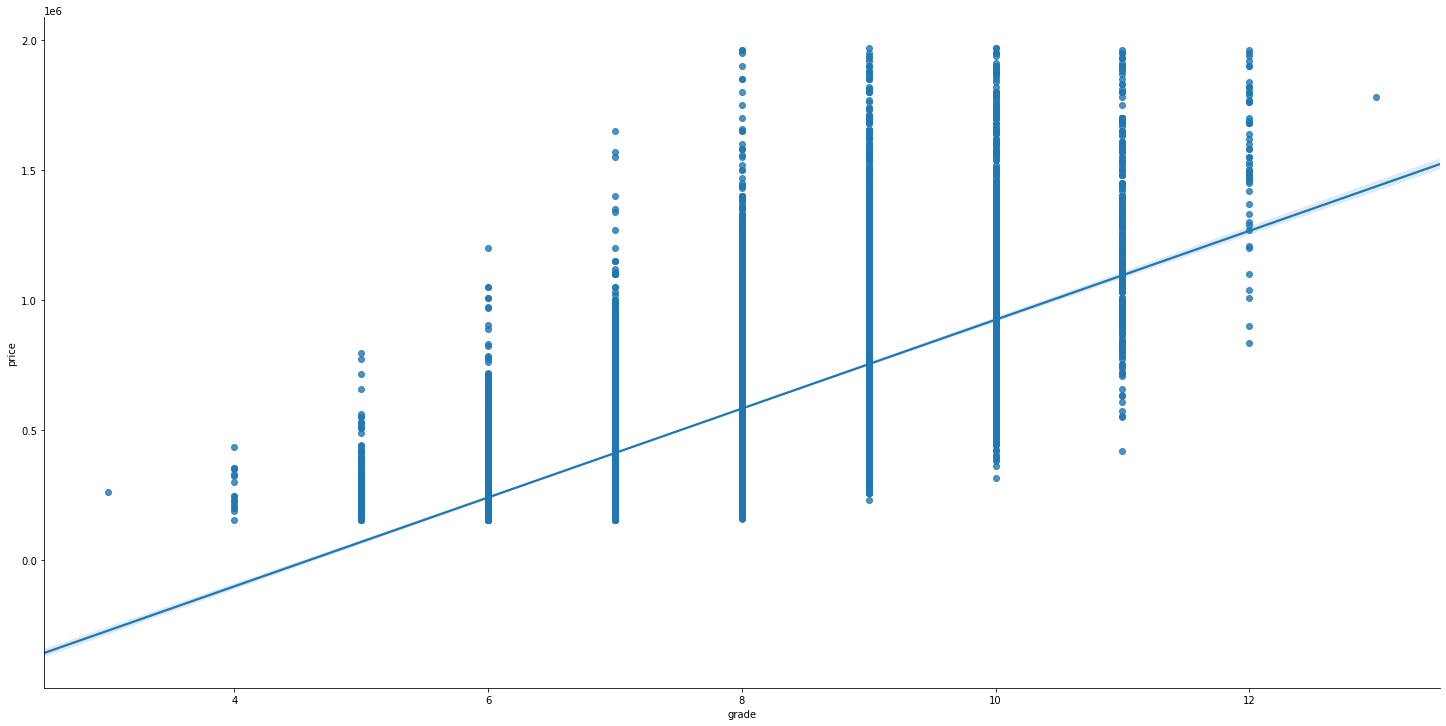

In [34]:
x = 'grade'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

LinregressResult(slope=222.80762469244533, intercept=62985.59363504668, rvalue=0.6734440920253956, pvalue=0.0, stderr=1.6810997439641988)

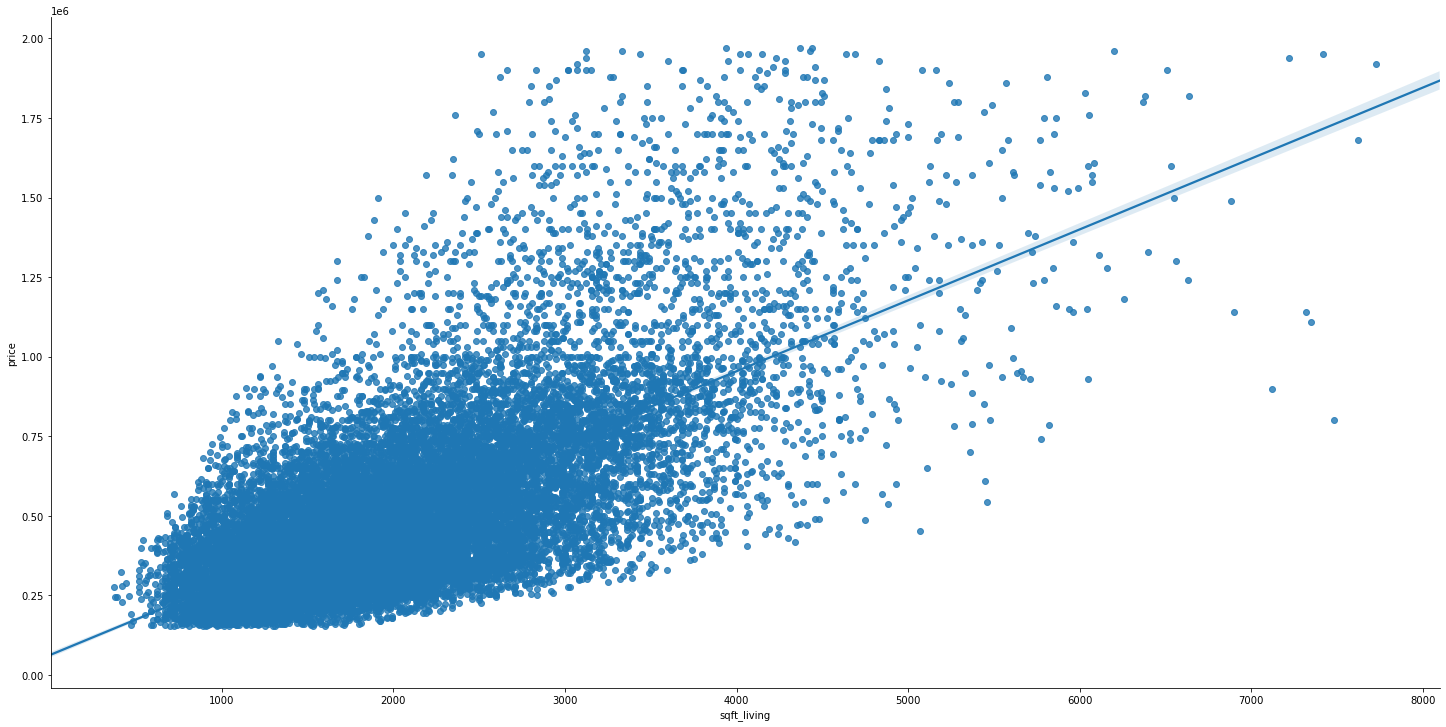

In [35]:
x = 'sqft_living'
y = 'price'

scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

linregress(df[x], df[y])

## Look for Multicollinearity

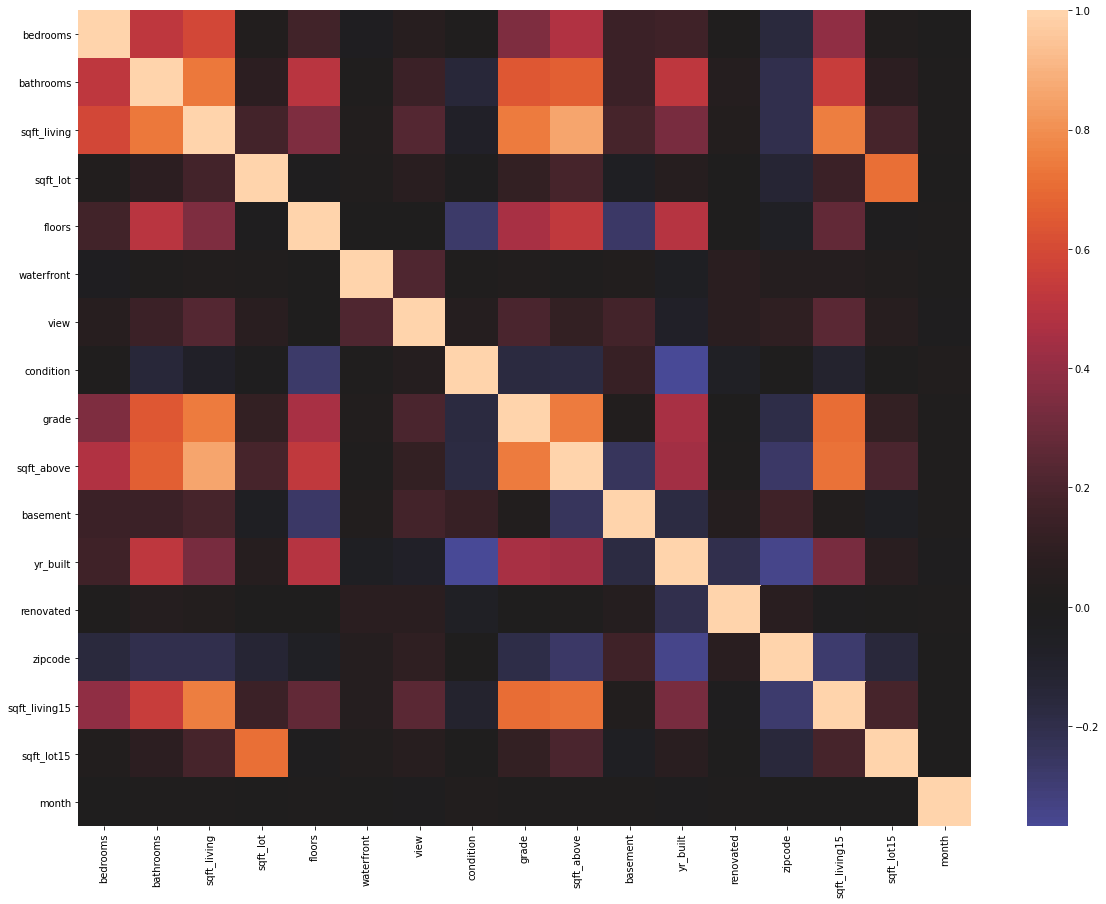

In [36]:
# look for multicollinearity of features

data_pred = df.drop('price', axis=1)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [37]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.75]


,level_0,level_1,correlation
pairs,,,
"(sqft_above, sqft_living)",sqft_above,sqft_living,0.866019
"(sqft_living, sqft_above)",sqft_living,sqft_above,0.866019
"(sqft_living, sqft_living15)",sqft_living,sqft_living15,0.752866
"(sqft_living15, sqft_living)",sqft_living15,sqft_living,0.752866


In [38]:
# we're going to drop sqft_above and sqft_living15, and just keep the base sqft_living

## Separate pre-processing categories

In [39]:
# prepare our categories for data transformation by separating into our data types -
# ordinal, continuous, categorical/dichotomous, and need to be binned/further processed

#'grade',

ordinal = ['zipcode', 'floors', 'bedrooms', 'bathrooms', 'condition']
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']
categorical_dichotomous = ['waterfront', 'view', 'renovated','basement', 'month']
bins = ['yr_built']

In [40]:
# make data frames of the separate data types that need to be processed separately

df_ordinal = df[ordinal]
df_continuous = df[continuous]
df_bins = df[bins]

I have a suspicion that zipcode is a very important predictor.

In [41]:
# for zipcode. We want to make 10 bins of 7 zip codes, with the zip codes sorted by median value
# so that we have the 7 highest median value zip codes in a group, then the next 7 highest, etc
# we're using the median house value for a zip code to determine the zip code's sort

zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].mean().sort_values(ascending=True))
zipsorted

,price
zipcode,
98002,2.415165e+05
98168,2.526502e+05
98032,2.594469e+05
98001,2.852993e+05
98148,2.911325e+05
...,...
98109,8.395185e+05
98112,9.439186e+05
98040,1.066568e+06


In [43]:
# try ranking ALL the zips as-is
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1

In [44]:
zipsorted

,price,rank
zipcode,,
98002,2.415165e+05,1
98168,2.526502e+05,2
98032,2.594469e+05,3
98001,2.852993e+05,4
98148,2.911325e+05,5
...,...,...
98109,8.395185e+05,66
98112,9.439186e+05,67
98040,1.066568e+06,68


In [45]:
zipsorted.drop('price', axis=1, inplace=True)

In [46]:
zipsorted

,rank
zipcode,
98002,1
98168,2
98032,3
98001,4
98148,5
...,...
98109,66
98112,67
98040,68


In [47]:
def cat_zips(x, zipsorted):
    y = zipsorted.loc[(zipsorted.index == x)]['rank']
    z = np.array(y)
    z[0]
    return z[0]

### Set - Ordinal

In [48]:
df_ordinal['zip_group'] = df_ordinal['zipcode'].apply(lambda x: cat_zips(x, zipsorted))

#### TO DO - make list map from zip code ranks in df_cont_ord for use later, right here

In [49]:
df_ordinal

,zipcode,floors,bedrooms,bathrooms,condition,zip_group
0,98178,1.0,3,1.00,3,14
1,98125,2.0,3,2.25,3,31
2,98028,1.0,2,1.00,3,32
3,98136,1.0,4,3.00,5,39
4,98074,1.0,3,2.00,3,56
...,...,...,...,...,...,...
21592,98103,3.0,3,2.50,3,44
21593,98146,2.0,4,2.50,3,21
21594,98144,2.0,2,0.75,3,40
21595,98027,2.0,3,2.50,3,47


In [50]:
df_ordinal.drop('zipcode',axis=1,  inplace=True)

In [51]:
df_ordinal

# our ordinal data is ready to be added to our final processed dataframe

,floors,bedrooms,bathrooms,condition,zip_group
0,1.0,3,1.00,3,14
1,2.0,3,2.25,3,31
2,1.0,2,1.00,3,32
3,1.0,4,3.00,5,39
4,1.0,3,2.00,3,56
...,...,...,...,...,...
21592,3.0,3,2.50,3,44
21593,2.0,4,2.50,3,21
21594,2.0,2,0.75,3,40
21595,2.0,3,2.50,3,47


### Set - Bins

In [52]:
# now we will bin our year built
df_bins

,yr_built
0,1955
1,1951
2,1933
3,1965
4,1987
...,...
21592,2009
21593,2014
21594,2009
21595,2004


In [53]:
# looking at our year built distribution. We're going to cut this into 5 bins instead of using it
# as a continuous value.

df_bins['yr_built'].describe()

count    21168.000000
mean      1971.203515
std         29.319848
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [54]:
# binning our year built into equally sized bins

df_bins["year_block"] = pd.qcut(df['yr_built'], q=5)

df_bins

,yr_built,year_block
0,1955,"(1947.0, 1965.0]"
1,1951,"(1947.0, 1965.0]"
2,1933,"(1899.999, 1947.0]"
3,1965,"(1947.0, 1965.0]"
4,1987,"(1983.0, 2001.0]"
...,...,...
21592,2009,"(2001.0, 2015.0]"
21593,2014,"(2001.0, 2015.0]"
21594,2009,"(2001.0, 2015.0]"
21595,2004,"(2001.0, 2015.0]"


In [55]:
# Check that our zip code groups are applied
df_bins

,yr_built,year_block
0,1955,"(1947.0, 1965.0]"
1,1951,"(1947.0, 1965.0]"
2,1933,"(1899.999, 1947.0]"
3,1965,"(1947.0, 1965.0]"
4,1987,"(1983.0, 2001.0]"
...,...,...
21592,2009,"(2001.0, 2015.0]"
21593,2014,"(2001.0, 2015.0]"
21594,2009,"(2001.0, 2015.0]"
21595,2004,"(2001.0, 2015.0]"


#### TEMP

don't drop first and see if we get a better result with the randomtreeregressor

In [56]:
makedummies = ['year_block']

processed_bins = pd.get_dummies(df_bins[makedummies], prefix=makedummies, drop_first=True)

#processed_bins = pd.get_dummies(df_bins[makedummies], prefix=makedummies)

In [57]:
processed_bins

# this is ready to be appended to our final processed df

,"year_block_(1947.0, 1965.0]","year_block_(1965.0, 1983.0]","year_block_(1983.0, 2001.0]","year_block_(2001.0, 2015.0]"
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
21592,0,0,0,1
21593,0,0,0,1
21594,0,0,0,1
21595,0,0,0,1


### Set - Categorical/Dichotomous

In [58]:
# remind myself of the list of things I am converting

categorical_dichotomous

['waterfront', 'view', 'renovated', 'basement', 'month']

In [59]:
# make sure these are category type

df[categorical_dichotomous] = df[categorical_dichotomous].astype('category')

In [60]:
# make dummies in a new df

df_cat_dic = pd.get_dummies(df[categorical_dichotomous], prefix=categorical_dichotomous, drop_first=True)

In [61]:
# new dataframe of dummy categorical data, ready to add to final processed df

df_cat_dic

,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21593,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Set - Continuous

In [62]:
continuous

['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']

In [63]:
df_continuous

,price,sqft_living,sqft_lot,sqft_lot15
0,221900.0,1180,5650,5650
1,538000.0,2570,7242,7639
2,180000.0,770,10000,8062
3,604000.0,1960,5000,5000
4,510000.0,1680,8080,7503
...,...,...,...,...
21592,360000.0,1530,1131,1509
21593,400000.0,2310,5813,7200
21594,402101.0,1020,1350,2007
21595,400000.0,1600,2388,1287


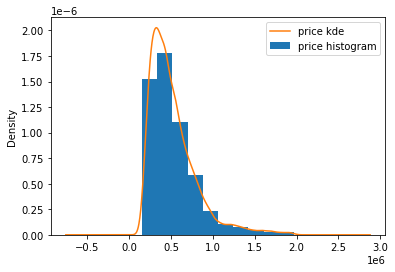

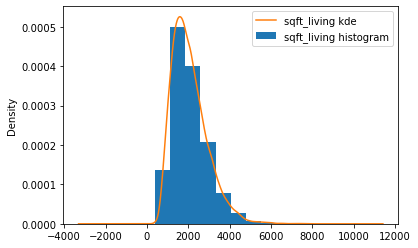

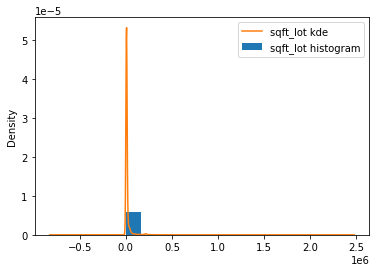

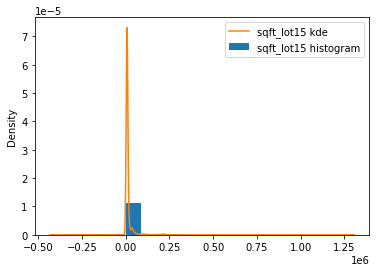

In [64]:
# check out our histograms for our continuous data

for column in df_continuous:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

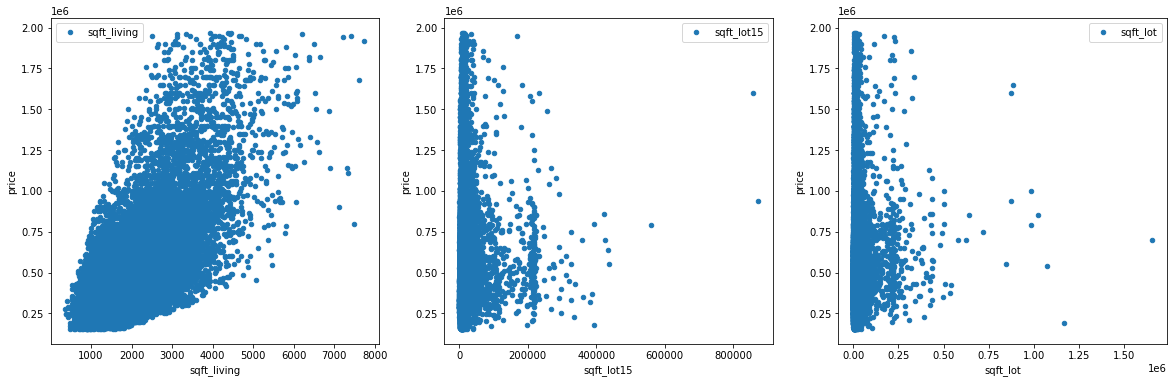

In [65]:
# let's check linearity of these features with our target data

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for idx, channel in enumerate(['sqft_living', 'sqft_lot15', 'sqft_lot']):
    df_continuous.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [66]:
# these are not normal, especially our neighbors data! We're going to try transforming and standardizing all of these.

In [67]:
# log features
log_names = [f'{column}_log' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names




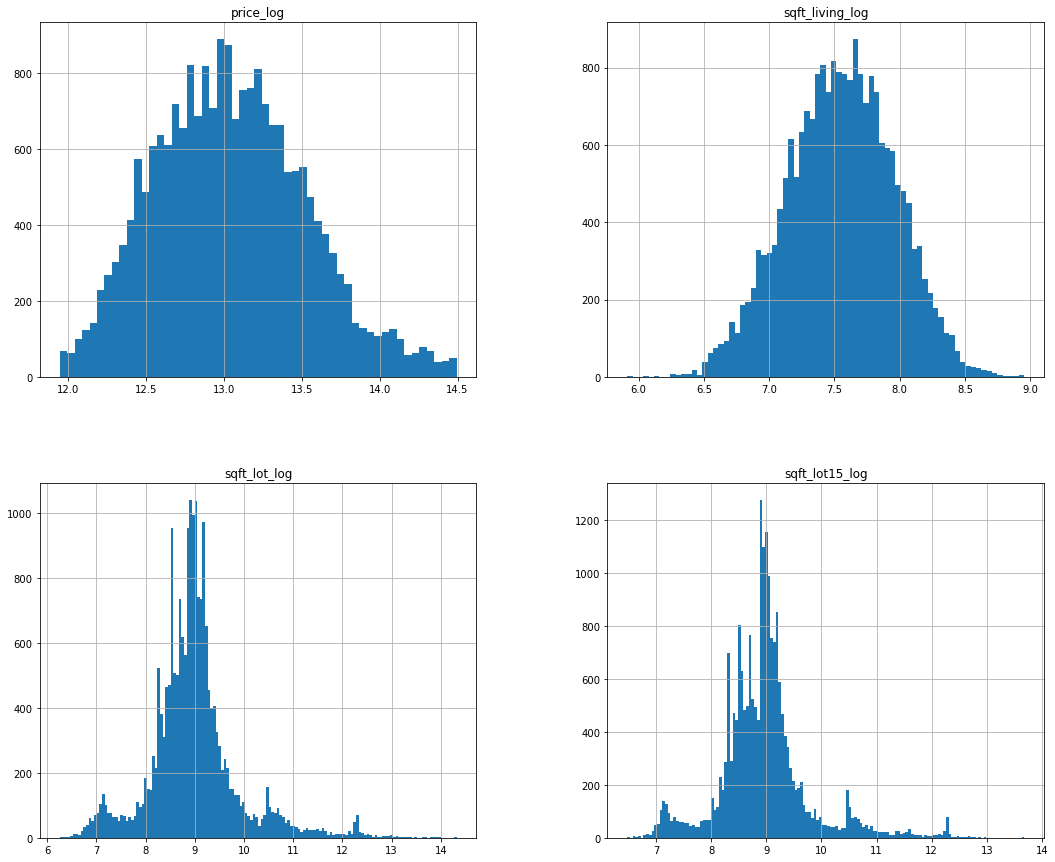

In [68]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks better

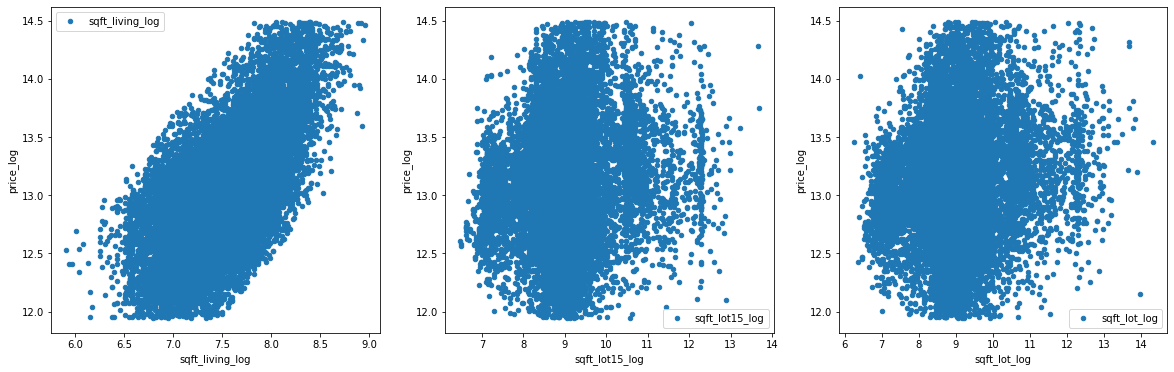

In [69]:
# let's check linearity of these features with our target data

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for idx, channel in enumerate(['sqft_living_log', 'sqft_lot15_log', 'sqft_lot_log']):
    df_continuous_log.plot(kind='scatter', x=channel, y='price_log', ax=axs[idx], label=channel)
plt.legend()
plt.show()

### Combine our processed data

In [70]:
# first we're going to combine all of our features that should be normalized (all features that are not encoded)

In [71]:
normalize_this = pd.concat([df_ordinal, df_continuous_log], axis=1)

In [72]:
# normalize with scikit-learn StandardScaler

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_transformed = normalize_this.apply(normalize)

In [73]:
preprocessed = pd.concat([df_transformed, df_cat_dic, processed_bins], axis=1)

In [74]:
preprocessed

,floors,bedrooms,bathrooms,condition,zip_group,price_log,sqft_living_log,sqft_lot_log,sqft_lot15_log,waterfront_1.0,view_1.0,renovated_1.0,basement_1.0,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,"year_block_(1947.0, 1965.0]","year_block_(1965.0, 1983.0]","year_block_(1983.0, 2001.0]","year_block_(2001.0, 2015.0]"
0,-0.916701,-0.415814,-1.495207,-0.634586,-1.129528,-1.515530,-1.158521,-0.380654,-0.387712,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0.936753,-0.415814,0.189749,-0.634586,-0.231297,0.313378,0.738687,-0.105841,-0.017174,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,-0.916701,-1.533949,-1.495207,-0.634586,-0.178460,-1.947691,-2.198972,0.251388,0.049037,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.916701,0.702321,1.200722,2.452021,0.191400,0.552341,0.078261,-0.515954,-0.537860,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,-0.916701,-0.415814,-0.147243,-0.634586,1.089631,0.203004,-0.297457,0.015374,-0.039243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.790207,-0.415814,0.526740,-0.634586,0.455585,-0.516281,-0.525412,-2.161388,-2.009627,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
21593,0.936753,0.702321,0.526740,-0.634586,-0.759668,-0.298702,0.478724,-0.349169,-0.089885,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21594,0.936753,-1.533949,-1.832199,-0.634586,0.244237,-0.287883,-1.513670,-1.965439,-1.659258,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
21595,0.936753,-0.415814,0.526740,-0.634586,0.614097,-0.298702,-0.416376,-1.334037,-2.205126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


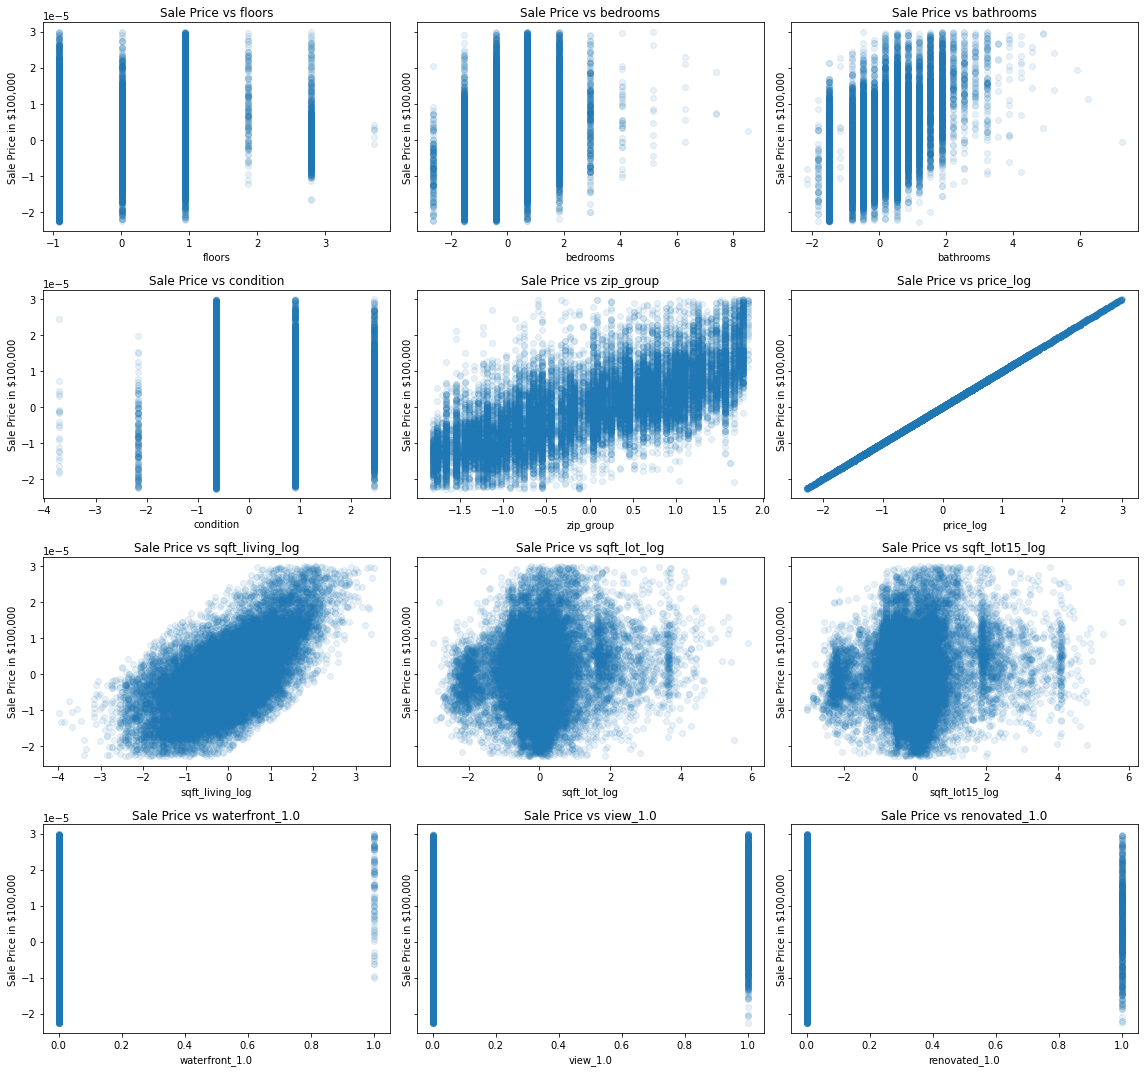

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), preprocessed.columns):
    ax.scatter(preprocessed[column], preprocessed['price_log'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

# Run initial model

In [76]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

predictors_int = sm.add_constant(X)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     3329.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:37:59   Log-Likelihood:                -12480.
No. Observations:               21168   AIC:                         2.502e+04
Df Residuals:                   21140   BIC:                         2.524e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1606      0.016      9.803      0.000       0.129       0.193
floors                          0.0409      0.005      8.610      0.000       0.032       0.050
bedrooms                       -0.0613      0.004    -15.085      0.000      -0.069      -0.053
bathrooms                       0.0885      0.005     16.327      0.000       0.078       0.099
condition                       0.0430      0.003     12.780      0.000       0.036       0.050
zip_group                       0.5782      0.003    180.453      0.000       0.572       0.585
sqft_living_log                 0.4743      0.006     81.216      0.000       0.463       0.486
sqft_lot_log                    0.0770      0.008      9.726      0.000       0.062       0.093
sqft_lot15_log                 -0.0443      0.008     -5.737      0.000      -0.059      -0.029
waterfront_1.0                  0.9230      0.045     20.570      0.000       0.835       1.011
view_1.0                        0.4024      0.011     36.284      0.000       0.381       0.424
renovated_1.0                   0.0709      0.018      4.030      0.000       0.036       0.105
basement_1.0                   -0.0238      0.008     -3.149      0.002      -0.039      -0.009
month_2                         0.0387      0.019      2.051      0.040       0.002       0.076
month_3                         0.0993      0.017      5.700      0.000       0.065       0.133
month_4                         0.1512      0.017      8.933      0.000       0.118       0.184
month_5                         0.0358      0.017      2.138      0.033       0.003       0.069
month_6                         0.0204      0.017      1.198      0.231      -0.013       0.054
month_7                        -0.0007      0.017     -0.040      0.968      -0.034       0.033
month_8                        -0.0069      0.017     -0.400      0.689      -0.041       0.027
month_9                        -0.0204      0.018     -1.158      0.247      -0.055       0.014
month_10                       -0.0068      0.017     -0.391      0.696      -0.041       0.027
month_11                       -0.0255      0.018     -1.385      0.166      -0.061       0.011
month_12                        0.0175      0.018      0.962      0.336      -0.018       0.053
year_block_(1947.0, 1965.0]    -0.1973      0.010    -19.890      0.000      -0.217      -0.178
year_block_(1965.0, 1983.0]    -0.3704      0.010    -35.943      0.000      -0.391      -0.350
year_block_(1983.0, 2001.0]    -0.3246      0.012    -26.403      0.000      -0.349      -0.300
year_block_(2001.0, 2015.0]    -0.2384      0.013    -17.890      0.000      -0.265      -0.212
==============================================================================
Omnibus:                    

In [77]:
y_pred = model.predict(predictors_int)

df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

df1

,Actual,Predicted
0,-1.515530,-1.429955
1,0.313378,0.290474
2,-1.947691,-1.032841
3,0.552341,0.220228
4,0.203004,0.314346
...,...,...
21592,-0.516281,0.053576
21593,-0.298702,-0.259624
21594,-0.287883,-0.769364
21595,-0.298702,0.157766


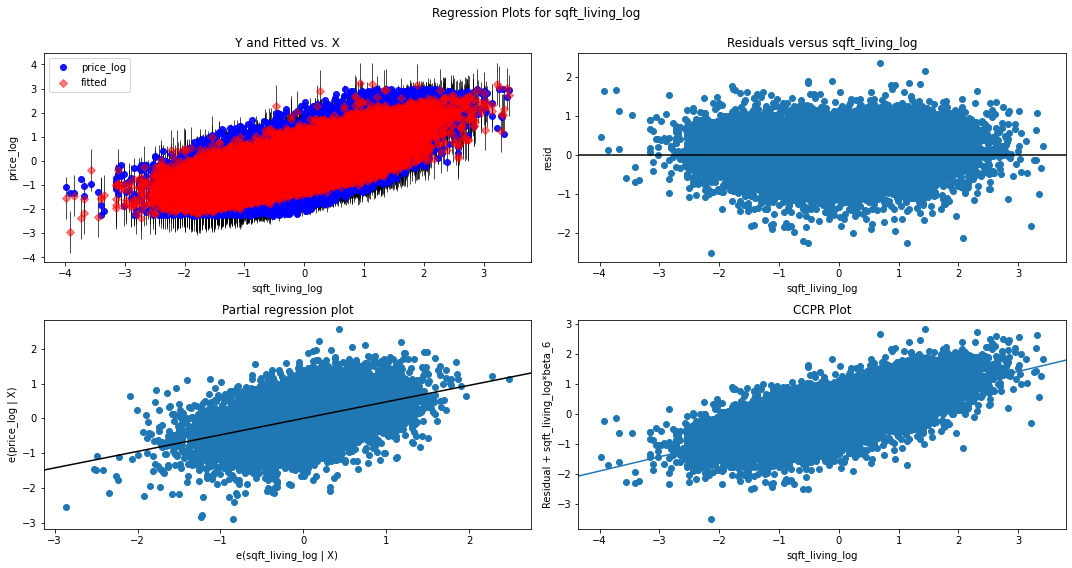

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living_log", fig=fig)
plt.show()

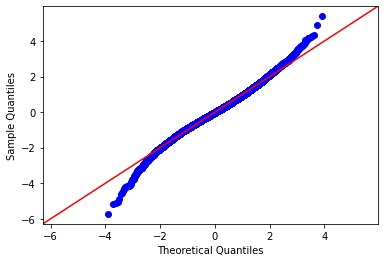

In [79]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [80]:
break

SyntaxError: 'break' outside loop (<ipython-input-80-6aaf1f276005>, line 1)

## Kinda stuck here

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

#### Trying stuff

In [ ]:
# trying a code snippet that uses a decision tree regressor and selects the best number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

# create pipeline
model = DecisionTreeRegressor()
rfe = RFECV(estimator=DecisionTreeRegressor())
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

#### Trying stuff

In [ ]:
# same functionality as previous code snippet, but removes pipeline which I have learned nothing about
# still picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X, y)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

#### Trying stuff

In [ ]:
# explore the number of selected features for RFE


# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(0, 37):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### Trying Stuff

In [ ]:
# create the random forest with your hyperparameters.
model = DecisionTreeRegressor()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)

final_df

#### Trying Stuff

In [ ]:
# forward selection model

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X, y, verbose=True)

print('resulting features:')
print(result)





In [ ]:
X = X[result]
y = preprocessed['price_log']

predictors_int = sm.add_constant(X)
model = sm.OLS(y, predictors_int).fit()
model.summary()

#### Current conclusions

Our efforts to try various ways to select features aren't improving our results. We need to try something else.

## Train-Test in k-fold

In [ ]:
break

## Stuff I'm not using

In [ ]:
zip_bins = pd.cut(zipsorted.index, right = True, precision=0, bins=10, include_lowest=True)

In [ ]:
# confirming we've made 10 zip code bins, after sorting the zip codes

zip_bins

In [ ]:
zip_bins.describe()

In [ ]:
# function to take in a zip code, find which bin its in, then return its bin category

def categorize_zips(x, y):
    for y in range(0, len(zip_bins.categories)):
        if x in zip_bins.categories[y]:
            return int(y+1)
        else: continue

In [ ]:
# apply the categorize_zips to each zip code in the dataframe, storing the new value in a new column 'zip_group'

df_ordinal['zip_group'] = df_ordinal['zipcode'].apply(lambda x: categorize_zips(x, zip_bins))

In [ ]:
# make sure that the zip_group is understood to be a category
df_bins['zip_group'] = df_bins['zip_group'].astype('category')

In [ ]:
# apply the categorize_zips to each zip code in the dataframe, storing the new value in a new column 'zip_group'

#df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: categorize_zips(x, zip_bins))

In [ ]:
# we are done using our plain zip code designator for now, having converted it into an ordinal variable
#df_bins.drop(['zipcode'], axis=1, inplace=True)